In [2]:
import numpy as np
import joblib
import pandas as pd
from sklearn.metrics import mean_squared_error

test_df = pd.read_csv("descriptor_test.csv")
x_test = test_df.drop(columns=['Kd'])
y_test = test_df['Kd']

# Load the saved models
rf_model = joblib.load("rf_optuna_model.pkl")
xgb_model = joblib.load("xgb_optuna_model.pkl")
lgb_model = joblib.load("lgb_optuna_model.pkl")
cat_model = joblib.load("cat_optuna_model.pkl")
meta_model = joblib.load("meta_model_optuna.pkl")

# Assume you have new samples to predict (in a DataFrame with the same feature columns)

# Get base model predictions
rf_pred = rf_model.predict(x_test)
xgb_pred = xgb_model.predict(x_test)
lgb_pred = lgb_model.predict(x_test)
cat_pred = cat_model.predict(x_test)

# Stack predictions and predict using meta-model
stacked_input = np.hstack([rf_pred.reshape(-1,1),
                           xgb_pred.reshape(-1,1),
                           lgb_pred.reshape(-1,1),
                           cat_pred.reshape(-1,1)])

y_pred = meta_model.predict(stacked_input)

from sklearn.metrics import mean_squared_error, mean_absolute_error , root_mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")


c:\Users\NongNam\Documents\AI_Builder\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Mean Squared Error: 1.4797
Mean Absolute Error: 0.9128
Root Mean Squared Error: 1.2164


C:\Users\NongNam\AppData\Local\Temp\ipykernel_17504\897430231.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, label="True Kd", shade=True)
C:\Users\NongNam\AppData\Local\Temp\ipykernel_17504\897430231.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred, label="Predicted Kd", shade=True)


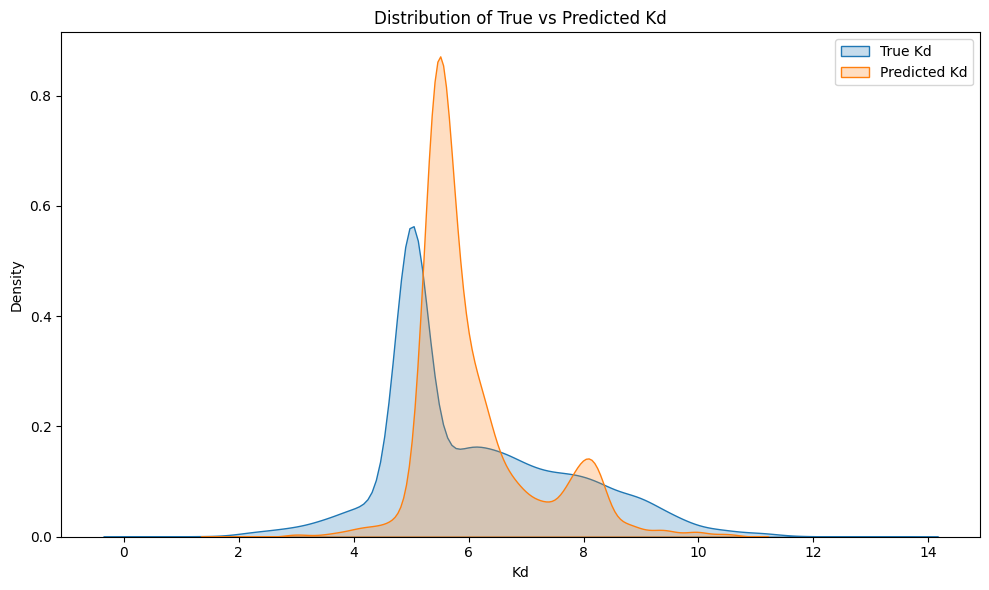

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot real vs predicted distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label="True Kd", shade=True)
sns.kdeplot(y_pred, label="Predicted Kd", shade=True)
plt.title("Distribution of True vs Predicted Kd")
plt.xlabel("Kd")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()